![SPU Logo](https://logos-download.com/wp-content/uploads/2019/07/Saint_Peters_University_Logo.png)

# Analysis on Online Fundraising at Saint Peter's University

In [1]:
# import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset 1 - online
online = pd.read_csv('C:\\Users\\conduit\\Downloads\\DS Final Dataset\\online_donations.csv', encoding='latin-1')

In [3]:
online.head()

,Key Indicator,Constituent ID,Class,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,FY21 Giving,...,Fund Description,Campaign Description,Total Amount of Gifts_1,Gift Total Number of Gifts_1,Gift Payment Type,Gift Batch Description,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount
0,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,$0.00,...,305-Hearts & Minds Scholarship Dinner (DAA),New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00
1,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,$0.00,...,306-Hearts & Minds Non-deductible (DAA),New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00
2,Individual,408242,NaN,$50.00,$50.00,$0.00,$0.00,$50.00,$0.00,$0.00,...,331-Unrestricted,New Campaign,$50.00,1,Venmo,NetCommunity Donations,5/31/2023,$50.00,5/31/2023,$50.00
3,Individual,407834,NaN,$35.00,$35.00,$0.00,$0.00,$35.00,$0.00,$0.00,...,331-Unrestricted,New Campaign,$35.00,1,Venmo,NetCommunity Event Registration Fees,05/03/2023,$35.00,05/03/2023,$35.00
4,Individual,39161,'97,"$1,153.26",$346.00,$599.76,$0.00,$223.00,$0.00,$0.00,...,331-Unrestricted,New Campaign,$223.00,2,Venmo,NetCommunity Event Registration Fees,03/12/1996,$25.00,5/18/2023,$123.00


In [4]:
online.shape

(13501, 28)

In [5]:
# add identifier for online gifts
online.insert(0, 'Online', 1)
online.head()

,Online,Key Indicator,Constituent ID,Class,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,...,Fund Description,Campaign Description,Total Amount of Gifts_1,Gift Total Number of Gifts_1,Gift Payment Type,Gift Batch Description,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount
0,1,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,...,305-Hearts & Minds Scholarship Dinner (DAA),New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00
1,1,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,...,306-Hearts & Minds Non-deductible (DAA),New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00
2,1,Individual,408242,NaN,$50.00,$50.00,$0.00,$0.00,$50.00,$0.00,...,331-Unrestricted,New Campaign,$50.00,1,Venmo,NetCommunity Donations,5/31/2023,$50.00,5/31/2023,$50.00
3,1,Individual,407834,NaN,$35.00,$35.00,$0.00,$0.00,$35.00,$0.00,...,331-Unrestricted,New Campaign,$35.00,1,Venmo,NetCommunity Event Registration Fees,05/03/2023,$35.00,05/03/2023,$35.00
4,1,Individual,39161,'97,"$1,153.26",$346.00,$599.76,$0.00,$223.00,$0.00,...,331-Unrestricted,New Campaign,$223.00,2,Venmo,NetCommunity Event Registration Fees,03/12/1996,$25.00,5/18/2023,$123.00


In [6]:
# load dataset 2 - offline
offline = pd.read_csv('C:\\Users\\conduit\\Downloads\\DS Final Dataset\\offline_donations.csv', encoding='latin-1')

In [7]:
offline.head()

,Key Indicator,Constituent ID,Class,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,FY21 Giving,...,Fund Description,Campaign Description,Total Amount of Gifts_1,Gift Total Number of Gifts_1,Gift Payment Type,Gift Batch Description,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount
0,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",$0.00,...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,used for recurring batch #2019-475,6/30/1986,$25.00,9/13/2024,"$1,000.00"
1,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",$0.00,...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,NaN,6/30/1986,$25.00,9/13/2024,"$1,000.00"
2,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",$0.00,...,505-General Scholarship Fund,New Campaign,$0.00,0,Personal Check,NaN,6/30/1986,$25.00,9/13/2024,"$1,000.00"
3,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",$0.00,...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,NaN,6/30/1986,$25.00,9/13/2024,"$1,000.00"
4,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",$0.00,...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,Check Batch,6/30/1986,$25.00,9/13/2024,"$1,000.00"


In [8]:
offline.shape

(21277, 28)

In [9]:
# add identifier for offline gifts
offline.insert(0, 'Online', 0)

In [10]:
offline.head()

,Online,Key Indicator,Constituent ID,Class,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,...,Fund Description,Campaign Description,Total Amount of Gifts_1,Gift Total Number of Gifts_1,Gift Payment Type,Gift Batch Description,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount
0,0,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,used for recurring batch #2019-475,6/30/1986,$25.00,9/13/2024,"$1,000.00"
1,0,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,NaN,6/30/1986,$25.00,9/13/2024,"$1,000.00"
2,0,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",...,505-General Scholarship Fund,New Campaign,$0.00,0,Personal Check,NaN,6/30/1986,$25.00,9/13/2024,"$1,000.00"
3,0,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,NaN,6/30/1986,$25.00,9/13/2024,"$1,000.00"
4,0,Individual,4913,'83,"$54,150.00","$29,000.00","$15,500.00","$2,000.00","$1,000.00","$1,000.00",...,331-Unrestricted,New Campaign,$0.00,0,Personal Check,Check Batch,6/30/1986,$25.00,9/13/2024,"$1,000.00"


In [11]:
# combine both dataset into 1
df = pd.concat([online, offline], ignore_index=True)

In [12]:
df.shape

(34778, 29)

In [13]:
df

,Online,Key Indicator,Constituent ID,Class,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,...,Fund Description,Campaign Description,Total Amount of Gifts_1,Gift Total Number of Gifts_1,Gift Payment Type,Gift Batch Description,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount
0,1,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,...,305-Hearts & Minds Scholarship Dinner (DAA),New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00
1,1,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,...,306-Hearts & Minds Non-deductible (DAA),New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00
2,1,Individual,408242,NaN,$50.00,$50.00,$0.00,$0.00,$50.00,$0.00,...,331-Unrestricted,New Campaign,$50.00,1,Venmo,NetCommunity Donations,5/31/2023,$50.00,5/31/2023,$50.00
3,1,Individual,407834,NaN,$35.00,$35.00,$0.00,$0.00,$35.00,$0.00,...,331-Unrestricted,New Campaign,$35.00,1,Venmo,NetCommunity Event Registration Fees,05/03/2023,$35.00,05/03/2023,$35.00
4,1,Individual,39161,'97,"$1,153.26",$346.00,$599.76,$0.00,$223.00,$0.00,...,331-Unrestricted,New Campaign,$223.00,2,Venmo,NetCommunity Event Registration Fees,03/12/1996,$25.00,5/18/2023,$123.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34773,0,Organization,382738,NaN,"$1,460,513.86","$1,334,913.86","$73,835.00","$89,050.00","$597,850.00","$567,950.00",...,331-Unrestricted,New Campaign,$0.00,0,Business Check,Check Batch,8/22/2007,"$5,000.00",12/02/2024,"$5,000.00"
34774,0,Organization,382738,NaN,"$1,460,513.86","$1,334,913.86","$73,835.00","$89,050.00","$597,850.00","$567,950.00",...,331-Unrestricted,New Campaign,$0.00,0,Business Check,NaN,8/22/2007,"$5,000.00",12/02/2024,"$5,000.00"
34775,0,Organization,382738,NaN,"$1,460,513.86","$1,334,913.86","$73,835.00","$89,050.00","$597,850.00","$567,950.00",...,305-Hearts & Minds Scholarship Dinner (DAA),New Campaign,$0.00,0,Business Check,NaN,8/22/2007,"$5,000.00",12/02/2024,"$5,000.00"
34776,0,Organization,382738,NaN,"$1,460,513.86","$1,334,913.86","$73,835.00","$89,050.00","$597,850.00","$567,950.00",...,"835-James H. Freis, Esq. '66 Endowed Scholarship",New Campaign,$0.00,0,Business Check,NaN,8/22/2007,"$5,000.00",12/02/2024,"$5,000.00"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34778 entries, 0 to 34777
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Online                        34778 non-null  int64  
 1   Key Indicator                 34778 non-null  object 
 2   Constituent ID                34778 non-null  object 
 3   Class                         23452 non-null  object 
 4   Cumulative Giving             34778 non-null  object 
 5   PR Commitments                34778 non-null  object 
 6   SATC Commitments              34778 non-null  object 
 7   FY24 Giving                   34778 non-null  object 
 8   FY23 Giving                   34778 non-null  object 
 9   FY22 Giving                   34778 non-null  object 
 10  FY21 Giving                   34778 non-null  object 
 11  FY20 Giving                   34778 non-null  object 
 12  FY19 Giving                   34778 non-null  object 
 13  F

In [15]:
# check null values
df.isnull().sum()

Online                              0
Key Indicator                       0
Constituent ID                      0
Class                           11326
Cumulative Giving                   0
PR Commitments                      0
SATC Commitments                    0
FY24 Giving                         0
FY23 Giving                         0
FY22 Giving                         0
FY21 Giving                         0
FY20 Giving                         0
FY19 Giving                         0
FY18 Giving                         0
Age                             16156
Preferred State                   769
Gift Date                           0
Gift Amount                         0
Fund Split Amount                   0
Fund Description                    0
Campaign Description                0
Total Amount of Gifts_1             0
Gift Total Number of Gifts_1        0
Gift Payment Type                   0
Gift Batch Description          16667
First Gift Date                     0
First Gift A

Seeing as the Class and Gift Batch Description have a lot of null values, they won't be used in this study. Age cannot be removed as it is an important variable in this study. It will be dealt with in the following codes.

In [16]:
# initially fill missing values in age as 0
df['Age'] = df['Age'].fillna(0).astype(int)

For now, all those without age will be given a value of 0. Do note that this includes donors that are not considered as individuals (i.e. organizations)

In [17]:
# view age distribution
age_groups = df['Age'].groupby(df['Age']).count()
age_groups

Age
0      16180
1          1
21         2
22         2
23        25
       ...  
98         3
100       35
101        2
105        5
152        2
Name: Age, Length: 84, dtype: int64

It's obvious that I would want to handle obviously erroneous data from Age (1 and 152). In this case, I would include them in the 0 age.

In [18]:
# change obviously wrong age to 0
df['Age'] = df['Age'].replace(1, 0)
df['Age'] = df['Age'].replace(152, 0)

In [19]:
# create a new column to define generations
# define the age bins and labels
age_bins = [0, 21, 28, 44, 60, 78, np.inf]
age_labels = ['Uncategorized', 'Generation Z', 'Millennials', 'Generation X', 'Baby Boomers', 'Silent Generation']

# create a new column 'AgeGroup' to group ages into their respective generations
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [20]:
# summarize AgeGroup
generation = df['AgeGroup'].value_counts().sort_index()

print("Count of constituents in each generation:")
print(generation)

Count of constituents in each generation:
AgeGroup
Uncategorized        16183
Generation Z           204
Millennials           1650
Generation X          2944
Baby Boomers          8755
Silent Generation     5042
Name: count, dtype: int64


Ignoring the uncategorized group, we can see that baby boomers and the silent generation form the majority of recent donors.

In [21]:
df.head()

,Online,Key Indicator,Constituent ID,Class,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,...,Campaign Description,Total Amount of Gifts_1,Gift Total Number of Gifts_1,Gift Payment Type,Gift Batch Description,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount,AgeGroup
0,1,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,...,New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00,Baby Boomers
1,1,Individual,8944,'86,"$141,548.04","$58,927.04","$33,780.00","$10,369.64",$660.00,$170.00,...,New Campaign,"$4,045.00",9,Venmo,NetCommunity Event Registration Fees,6/30/1989,$100.00,08/12/2024,$50.00,Baby Boomers
2,1,Individual,408242,NaN,$50.00,$50.00,$0.00,$0.00,$50.00,$0.00,...,New Campaign,$50.00,1,Venmo,NetCommunity Donations,5/31/2023,$50.00,5/31/2023,$50.00,Uncategorized
3,1,Individual,407834,NaN,$35.00,$35.00,$0.00,$0.00,$35.00,$0.00,...,New Campaign,$35.00,1,Venmo,NetCommunity Event Registration Fees,05/03/2023,$35.00,05/03/2023,$35.00,Uncategorized
4,1,Individual,39161,'97,"$1,153.26",$346.00,$599.76,$0.00,$223.00,$0.00,...,New Campaign,$223.00,2,Venmo,NetCommunity Event Registration Fees,03/12/1996,$25.00,5/18/2023,$123.00,Generation X


In [22]:
# convert date columns to datetime
date_columns = ['Gift Date', 'First Gift Date', 'Last Gift Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

This is useful when applying time-series analysis later.

In [23]:
# convert amount columns to float
amount_columns = ['Cumulative Giving'
                  ,'PR Commitments'
                  ,'SATC Commitments'
                  ,'FY24 Giving'
                  ,'FY23 Giving'
                  ,'FY22 Giving'
                  ,'FY21 Giving'
                  ,'FY20 Giving'
                  ,'FY19 Giving'
                  ,'FY18 Giving'
                  ,'Gift Amount'
                  ,'Fund Split Amount'
                  ,'Total Amount of Gifts_1'
                  ,'First Gift Amount'
                  ,'Last Gift Amount']
for col in amount_columns:
    df[col] = df[col].fillna('').astype(str)
    df[col] = df[col].replace('[\$,]', '', regex=True).replace('^$', np.nan, regex=True).astype(float)

This is useful when applying machine learning algorithms later.

In [24]:
print(df.dtypes)

Online                                   int64
Key Indicator                           object
Constituent ID                          object
Class                                   object
Cumulative Giving                      float64
PR Commitments                         float64
SATC Commitments                       float64
FY24 Giving                            float64
FY23 Giving                            float64
FY22 Giving                            float64
FY21 Giving                            float64
FY20 Giving                            float64
FY19 Giving                            float64
FY18 Giving                            float64
Age                                      int32
Preferred State                         object
Gift Date                       datetime64[ns]
Gift Amount                            float64
Fund Split Amount                      float64
Fund Description                        object
Campaign Description                    object
Total Amount 

In [25]:
df.describe()

,Online,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,FY21 Giving,FY20 Giving,FY19 Giving,...,Age,Gift Date,Gift Amount,Fund Split Amount,Total Amount of Gifts_1,Gift Total Number of Gifts_1,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount
count,34778.000000,3.477800e+04,3.477800e+04,3.477800e+04,3.477800e+04,34778.000000,3.477800e+04,3.477800e+04,34778.000000,3.477800e+04,...,34778.000000,34778,3.477800e+04,3.477800e+04,34778.000000,34778.000000,34778,34778.000000,34778,34778.000000
mean,0.388205,1.431870e+05,8.099856e+04,3.290833e+04,6.772929e+03,6506.449862,7.927762e+03,1.105502e+04,7274.891939,1.387641e+04,...,35.921531,2021-07-18 04:48:38.258669568,4.784415e+03,3.149991e+03,1798.498220,6.233481,1992-08-17 13:22:18.846397056,1086.581808,2023-08-27 12:05:20.478463488,1628.306765
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,2016-09-08 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000,1960-01-01 00:00:00,0.000000,2017-01-23 00:00:00,0.000000
25%,0.000000,9.500000e+02,3.422500e+02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000,2019-12-29 00:00:00,5.000000e+01,4.000000e+01,0.000000,0.000000,1974-06-30 00:00:00,20.000000,2022-12-30 00:00:00,50.000000
50%,0.000000,5.285000e+03,1.800000e+03,6.000000e+02,1.500000e+02,150.000000,2.000000e+02,1.538400e+02,143.400000,1.500000e+02,...,37.000000,2021-07-29 00:00:00,1.000000e+02,1.000000e+02,101.490000,1.000000,1992-12-27 00:00:00,50.000000,2024-04-10 00:00:00,100.000000
75%,1.000000,4.073747e+04,1.596556e+04,5.043875e+03,1.496000e+03,1225.000000,1.300000e+03,1.360000e+03,1050.000000,1.085000e+03,...,72.000000,2022-12-30 00:00:00,5.000000e+02,3.333300e+02,1021.060000,6.000000,2013-10-04 12:00:00,118.000000,2024-10-13 00:00:00,500.000000
max,1.000000,1.544301e+07,1.011492e+07,7.698205e+06,1.045965e+06,597850.000000,1.025000e+06,2.024700e+06,1000000.000000,7.713783e+06,...,105.000000,2024-06-30 00:00:00,1.000000e+07,5.000000e+06,150000.000000,131.000000,2024-06-26 00:00:00,400000.000000,2024-12-05 00:00:00,500000.000000
std,0.487349,7.589732e+05,4.519268e+05,2.933194e+05,3.960859e+04,37129.838650,4.821625e+04,7.670454e+04,39414.715885,2.057803e+05,...,35.382633,NaN,1.238831e+05,6.950579e+04,5841.482541,14.330607,NaN,10565.530432,NaN,11360.584726


In [26]:
# set the pandas option to display numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,Online,Cumulative Giving,PR Commitments,SATC Commitments,FY24 Giving,FY23 Giving,FY22 Giving,FY21 Giving,FY20 Giving,FY19 Giving,...,Age,Gift Date,Gift Amount,Fund Split Amount,Total Amount of Gifts_1,Gift Total Number of Gifts_1,First Gift Date,First Gift Amount,Last Gift Date,Last Gift Amount
count,34778.00,34778.00,34778.00,34778.00,34778.00,34778.00,34778.00,34778.00,34778.00,34778.00,...,34778.00,34778,34778.00,34778.00,34778.00,34778.00,34778,34778.00,34778,34778.00
mean,0.39,143186.97,80998.56,32908.33,6772.93,6506.45,7927.76,11055.02,7274.89,13876.41,...,35.92,2021-07-18 04:48:38.258669568,4784.41,3149.99,1798.50,6.23,1992-08-17 13:22:18.846397056,1086.58,2023-08-27 12:05:20.478463488,1628.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2016-09-08 00:00:00,0.00,0.00,0.00,0.00,1960-01-01 00:00:00,0.00,2017-01-23 00:00:00,0.00
25%,0.00,950.00,342.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2019-12-29 00:00:00,50.00,40.00,0.00,0.00,1974-06-30 00:00:00,20.00,2022-12-30 00:00:00,50.00
50%,0.00,5285.00,1800.00,600.00,150.00,150.00,200.00,153.84,143.40,150.00,...,37.00,2021-07-29 00:00:00,100.00,100.00,101.49,1.00,1992-12-27 00:00:00,50.00,2024-04-10 00:00:00,100.00
75%,1.00,40737.47,15965.56,5043.88,1496.00,1225.00,1300.00,1360.00,1050.00,1085.00,...,72.00,2022-12-30 00:00:00,500.00,333.33,1021.06,6.00,2013-10-04 12:00:00,118.00,2024-10-13 00:00:00,500.00
max,1.00,15443006.28,10114916.00,7698205.00,1045965.00,597850.00,1025000.00,2024700.00,1000000.00,7713782.80,...,105.00,2024-06-30 00:00:00,10000000.00,5000000.00,150000.00,131.00,2024-06-26 00:00:00,400000.00,2024-12-05 00:00:00,500000.00
std,0.49,758973.22,451926.77,293319.45,39608.59,37129.84,48216.25,76704.54,39414.72,205780.26,...,35.38,NaN,123883.11,69505.79,5841.48,14.33,NaN,10565.53,NaN,11360.58


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34778 entries, 0 to 34777
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Online                        34778 non-null  int64         
 1   Key Indicator                 34778 non-null  object        
 2   Constituent ID                34778 non-null  object        
 3   Class                         23452 non-null  object        
 4   Cumulative Giving             34778 non-null  float64       
 5   PR Commitments                34778 non-null  float64       
 6   SATC Commitments              34778 non-null  float64       
 7   FY24 Giving                   34778 non-null  float64       
 8   FY23 Giving                   34778 non-null  float64       
 9   FY22 Giving                   34778 non-null  float64       
 10  FY21 Giving                   34778 non-null  float64       
 11  FY20 Giving                 

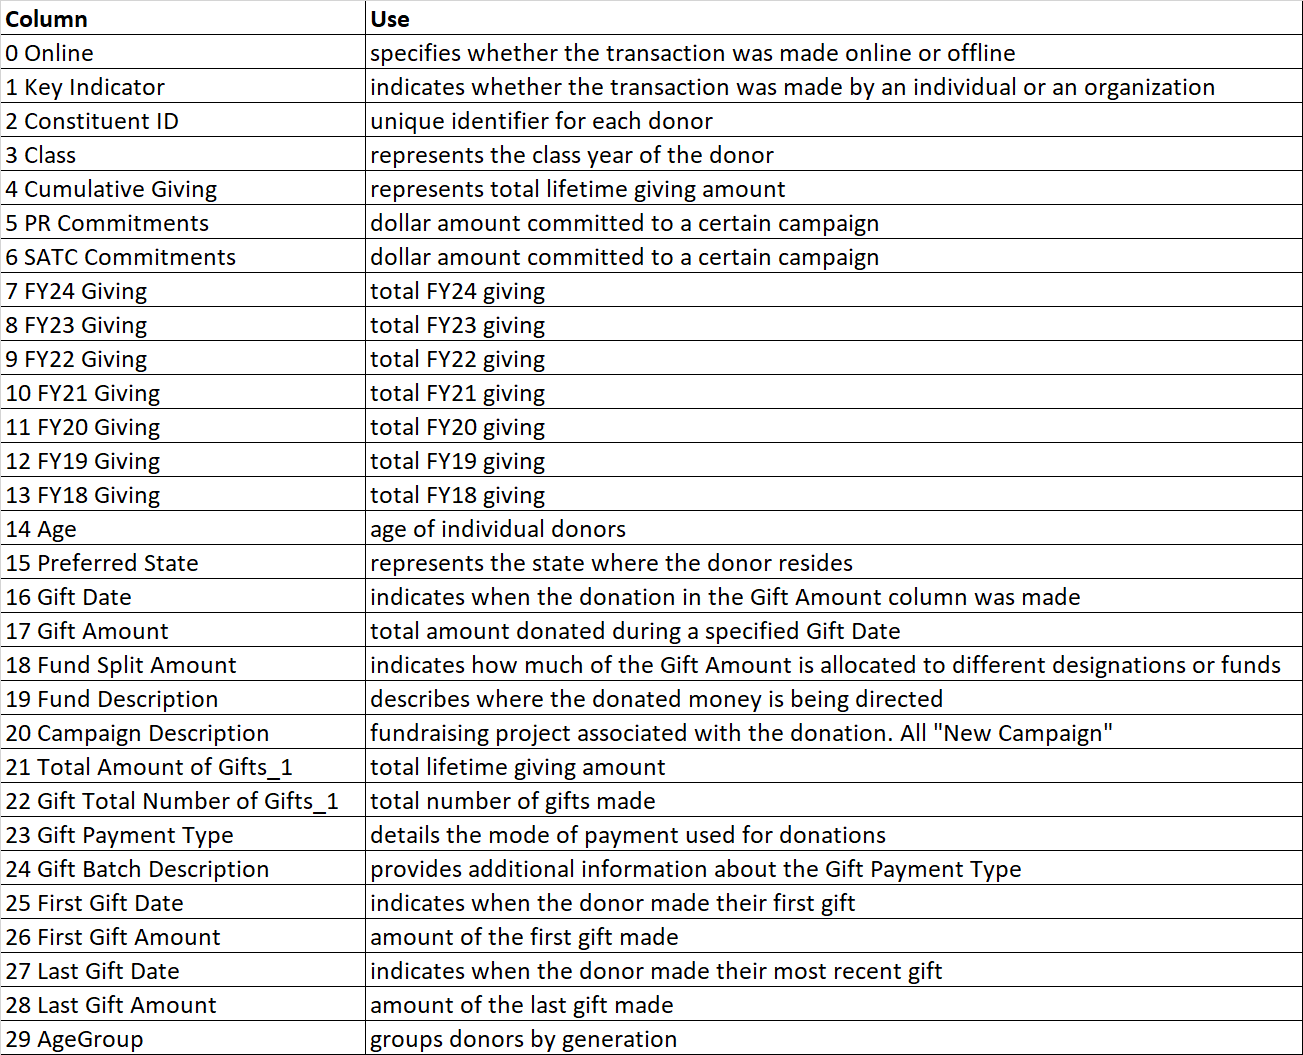

## Visualizations

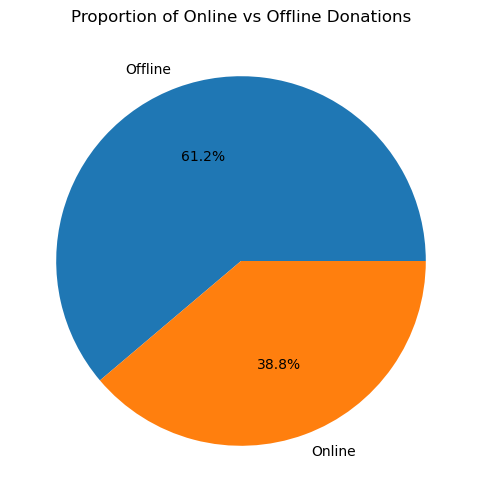

In [28]:
# pie chart of online vs offline donations
online_counts = df['Online'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(online_counts, labels=['Offline', 'Online'], autopct='%1.1f%%')
plt.title('Proportion of Online vs Offline Donations')
plt.show()

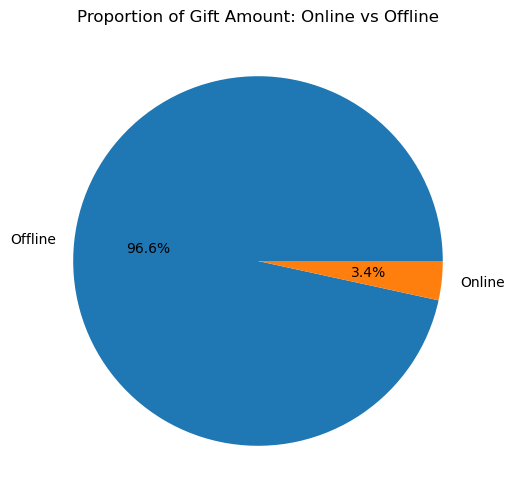

In [29]:
# pie chart of proportion of online vs offline in terms of fund split amount
gift_amounts = df.groupby('Online')['Fund Split Amount'].sum()

plt.figure(figsize=(6, 6))
plt.pie(gift_amounts, labels=['Offline', 'Online'], autopct='%1.1f%%')
plt.title('Proportion of Gift Amount: Online vs Offline')
plt.show()

The imbalance between the dollars received online vs offline is the reason why I am making this study. Despite technological advancements in fundraising, the vast majority of donations are still coming from offline channels. These proportions suggests that there may be significant opportunities to increase online giving. Can the online share of the pie be improved?

Donation Count:
Offline donations: 61.2% of total donations
Online donations: 38.8% of total donations

Gift Amount Proportion:
Offline donations: 96.6% of total gift amount
Online donations: 3.4% of total gift amount

Insights:
- Offline donations have a significantly higher average gift size
- Online donations tend to be smaller but more frequent
- Traditional fundraising methods remain crucial for securing larger gifts
- There's potential to increase the value of online giving
- Donors making larger contributions prefer offline methods

<Figure size 1200x600 with 0 Axes>

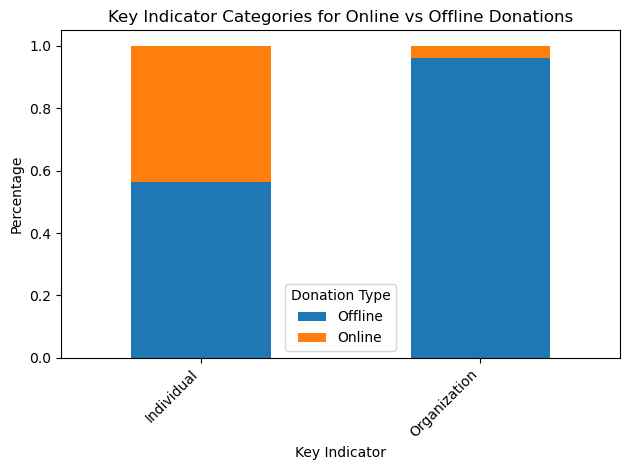

In [30]:
# stacked bar chart of key indicator categories for online vs offline donations
key_indicator_online = df.groupby(['Key Indicator', 'Online']).size().unstack()
key_indicator_online_pct = key_indicator_online.div(key_indicator_online.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
key_indicator_online_pct.plot(kind='bar', stacked=True)
plt.title('Key Indicator Categories for Online vs Offline Donations')
plt.xlabel('Key Indicator')
plt.ylabel('Percentage')
plt.legend(title='Donation Type', labels=['Offline', 'Online'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Individual donors:
- More than 40% prefer online donations

Organizational donors:
- Strongly prefer offline donations (~95%)

It's no surprise that individuals would have more online transactions compared to organizations which are usually systematic and traditional in their approach towards donations. This also proves the point that online donations tend to be smaller but frequent.

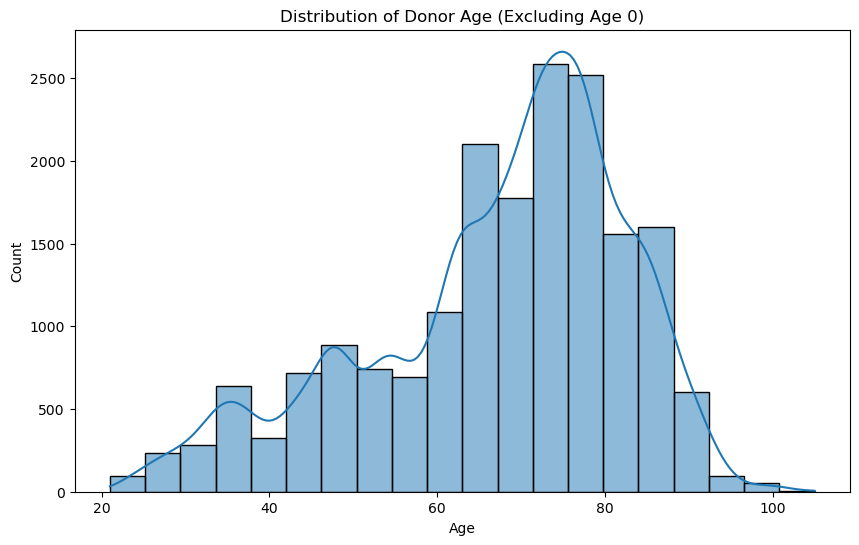

In [31]:
# histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Age'] > 0], x='Age', bins=20, kde=True)
plt.title('Distribution of Donor Age (Excluding Age 0)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Age distribution:
- Peak: 70-80 years old (about 2,500 donors)
- Right-skewed pattern
- Gradual increase from 20-60, sharp rise after 60, decline after 80

Age segments:
- Young (20-40): Low representation
- Middle-aged (40-60): Moderate, steady increase
- Senior (60-80): Highest representation
- Elderly (80+): Gradual decline

Notables:
- Small secondary peak around age 40
- Fluctuations between 45-60
- Not surprisingly, a steep decline after 80

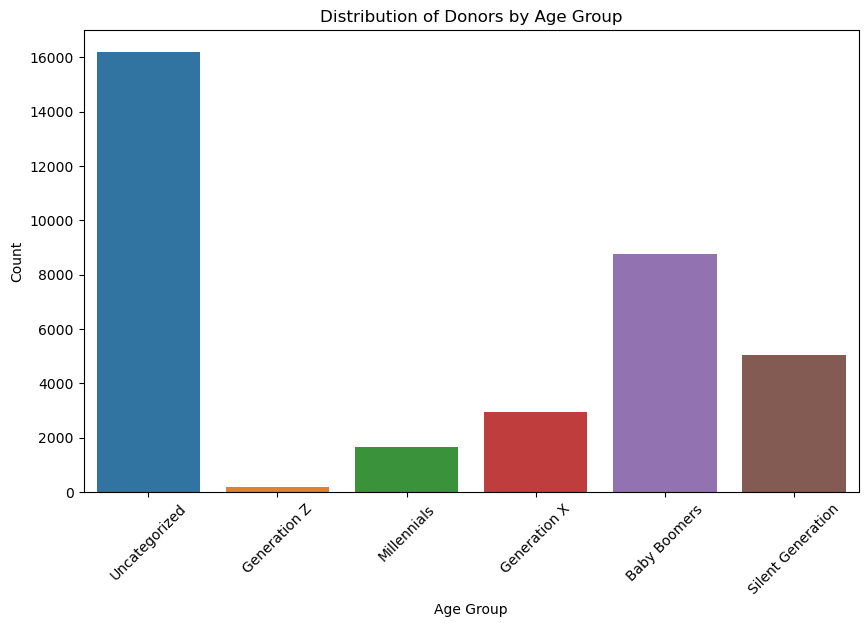

In [32]:
# bar chart of generations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup')
plt.title('Distribution of Donors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Generational breakdown:
- Baby Boomers (~8,800 donors)
- Silent Generation (~5,000 donors)
- Generation X (~3,000 donors)
- Millennials (~1,700 donors)
- Generation Z (>100 donors)
- Uncategorized (~16,000 donors)

Notables:
- Gen X and Millennials likely to increase giving capabilities as they enter a more stable time in their lives
- Prepare for the next generations as baby boomers and the silent generation have limited time left
- Cultivate long-term relationships with younger donors especially Gen Z and Millennials

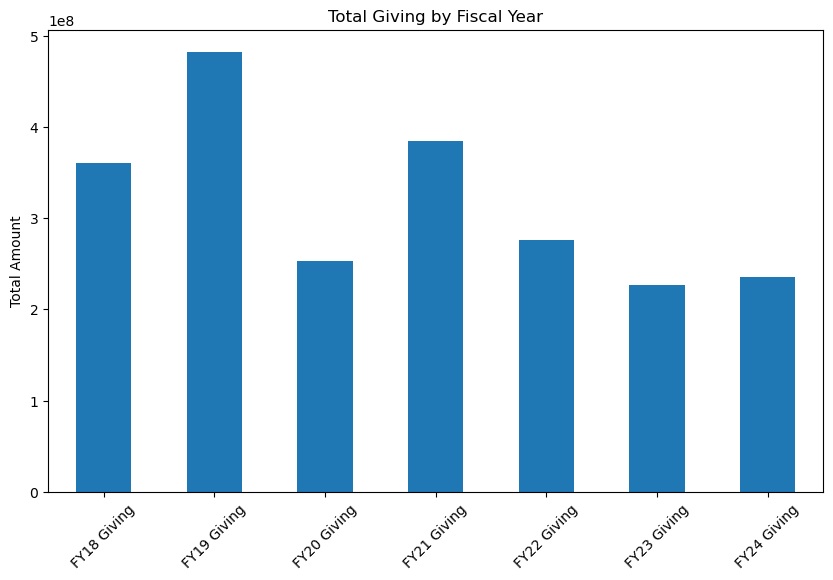

In [33]:
# bar chart of giving trends over time
yearly_giving = df[['FY18 Giving', 'FY19 Giving', 'FY20 Giving', 'FY21 Giving', 'FY22 Giving', 'FY23 Giving', 'FY24 Giving']]
yearly_totals = yearly_giving.sum()

plt.figure(figsize=(10,6))
yearly_totals.plot(kind='bar')
plt.title('Total Giving by Fiscal Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

Notables
- Total giving peaked in FY19 (~USD500 million), dropped sharply in FY20 (~USD250 million), then partially recovered.
- FY20 decline coincided with COVID-19 pandemic, forcing the shift to online fundraising.
- FY21 saw a big recovery (~USD380 million) due to easing up of regulations.
- FY22-FY24 shows stabilization around USD230 million which could indicate the new normal in terms of donations.
- Factors influencing shift to online giving:
    - The COVID-19 pandemic forced the accelerated adoption of online platforms
    - Younger donors' preference for online donations
    - Economic uncertainties
    - Improved online platforms and digital wallets 
    - Changed fundraising priorities

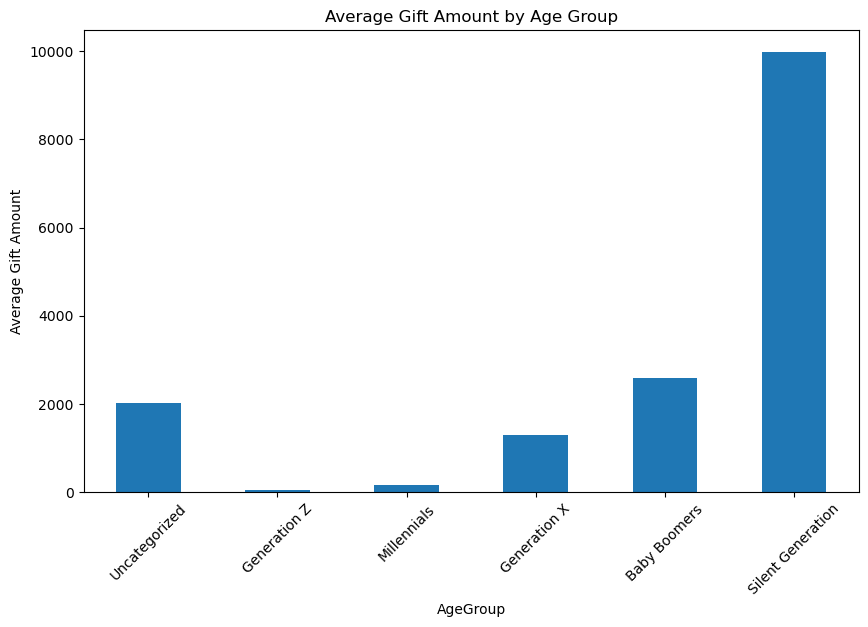

In [34]:
# bar chart of agegroup distribution in relation to their giving in a whole campaign
plt.figure(figsize=(10,6))
df.groupby('AgeGroup')['Fund Split Amount'].mean().plot(kind='bar')
plt.title('Average Gift Amount by Age Group')
plt.ylabel('Average Gift Amount')
plt.xticks(rotation=45)
plt.show()

Average gift amounts by generation:
- Silent Generation: Highest at ~USD10,000
- Baby Boomers: Second highest at ~USD2,500
- Generation X: ~USD1,250
- Millennials and Generation Z: Both under USD500
- Uncategorized group: High average gift amount of about USD2,000

Notables:
- Older generations show higher giving capacity because of accumulated wealth
- The younger generations' lower amounts could reflect early career stages and financial pressures
- The difference between the silent generation and the baby boomers is staggering seeing as we saw that there are more baby boomers compared to the silent generation. Goes to show that years of accumulated wealth and nearing the final stages of life possibly urges people to donate.
- Millennials and Gen Z Potentially have a different approach to philanthropy (i.e. frequent, smaller donations)

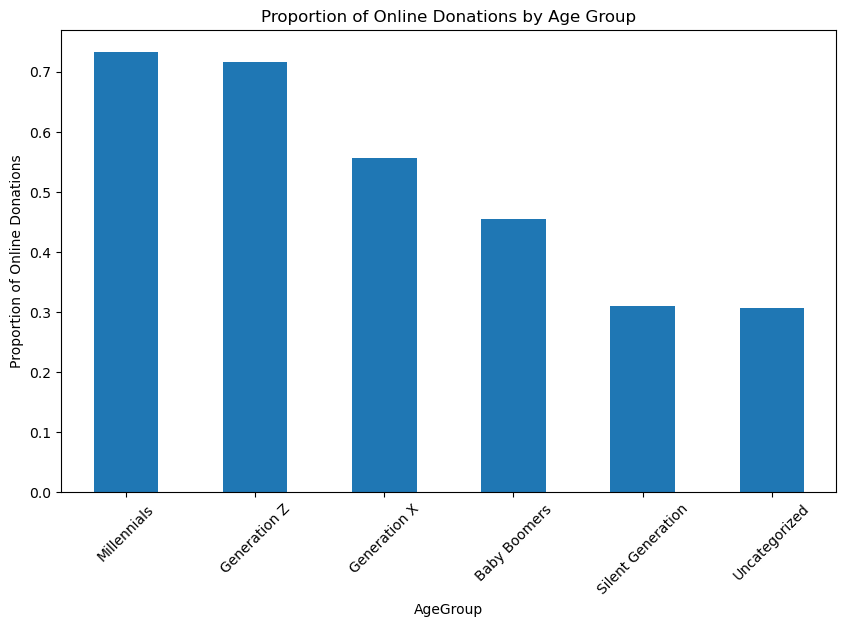

In [35]:
# bart chart of online donation preference by age group
online_by_age = df.groupby('AgeGroup')['Online'].mean().sort_values(ascending=False)

online_by_age.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Online Donations by Age Group')
plt.ylabel('Proportion of Online Donations')
plt.xticks(rotation=45)
plt.show()

Yonger generations:
- Millennials: ~73% prefer online donations
- Generation Z: ~71% prefer online donations

Older generations:
- Generation X: ~55% prefer online donations
- Baby Boomers: ~45% prefer online donations
- Silent Generation: ~31% prefer online donations

Notables:
- There is a clear inverse relationship between age and online donation preference
- Each older generation shows 10-15% decrease in online giving preference
- The uncategorized group has similar trend with the silent generation which could imply similar age demographics but could be unlikely as this group mostly comprises of organizations

Possible fundraising strategies:
- A more digital-focus approach for younger donors
- Multi-channel strategies for middle-aged donors
- Traditional giving approach for older donors

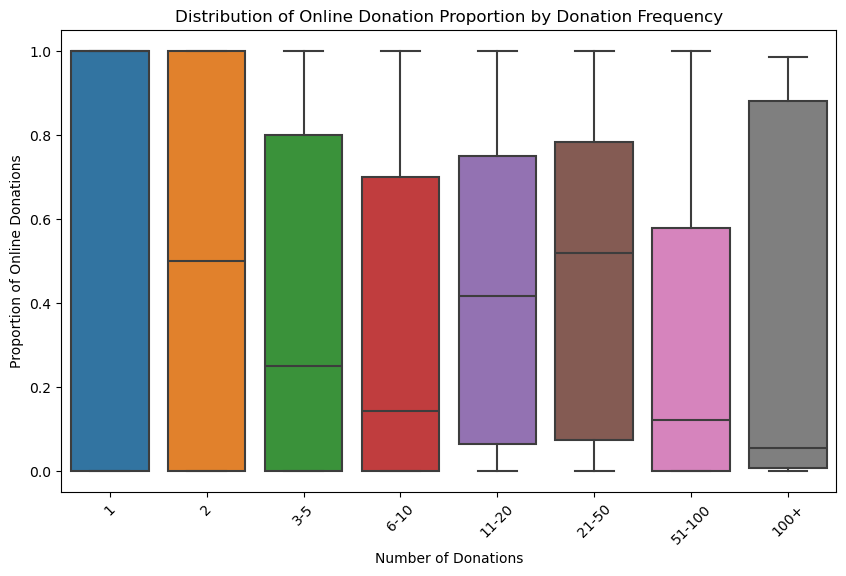

In [36]:
# box and whiskers plot of the distribution of online donation frequency
donation_frequency = df.groupby('Constituent ID')['Online'].agg(['count', 'mean'])
donation_frequency['frequency_bin'] = pd.cut(donation_frequency['count'], 
                                      bins=[0, 1, 2, 5, 10, 20, 50, 100, float('inf')],
                                      labels=['1', '2', '3-5', '6-10', '11-20', '21-50', '51-100', '100+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='frequency_bin', y='mean', data=donation_frequency)
plt.title('Distribution of Online Donation Proportion by Donation Frequency')
plt.xlabel('Number of Donations')
plt.ylabel('Proportion of Online Donations')
plt.xticks(rotation=45)
plt.show()

Notables:
- The first box is compressed into a single line which indicates that all single donations are either 100% online or 100% offline. This suggests a clear distinction in the chosen method for one-time donors.
- As the number of donations increases from 2 to 3-5 and beyond, we see expanding boxes and whiskers which indicates greater variability in the proportion of online donations among more frequent donors.
- The median (horizontal line inside the box) generally decreases as donation frequency increases which suggests that more frequent donors tend to have a lower proportion of online donations.
- The box for the highest frequency donors (100+) shows a wide range, but with a lower median which indicates that while some very frequent donors use online methods extensively, many prefer offline donations.
- The whiskers represent outliers in each group which show that in almost every frequency group, there are donors who are atypical in terms of online donation.

## Recoding of Categorical Variables

In [37]:
# convert Key Indicator to numerical values
df['KeyIndicator2'] = df['Key Indicator'].map(lambda x: 1 if x == 'Individual' else 0)

# create a mapping dictionary for AgeGroup values
generation = {'Uncategorized': 0
                    ,'Generation Z': 1
                    ,'Millennials': 2
                    ,'Generation X': 3
                    ,'Baby Boomers': 4
                    ,'Silent Generation': 5}

# apply mapping to craete a new column
df['AgeGroup2'] = df['AgeGroup'].map(generation).astype(int)

In [38]:
# define select features for heatmap
select_features = ['Online'
                ,'KeyIndicator2'
                ,'Cumulative Giving'
                ,'PR Commitments'
                ,'SATC Commitments'
                ,'FY24 Giving'
                ,'FY23 Giving'
                ,'FY22 Giving'
                ,'FY21 Giving'
                ,'FY20 Giving'
                ,'FY19 Giving'
                ,'FY18 Giving'
                ,'Age'
                ,'Gift Date'
                ,'Fund Split Amount'
                ,'First Gift Date'
                ,'First Gift Amount'
                ,'Last Gift Date'
                ,'Last Gift Amount'
                ,'AgeGroup2']

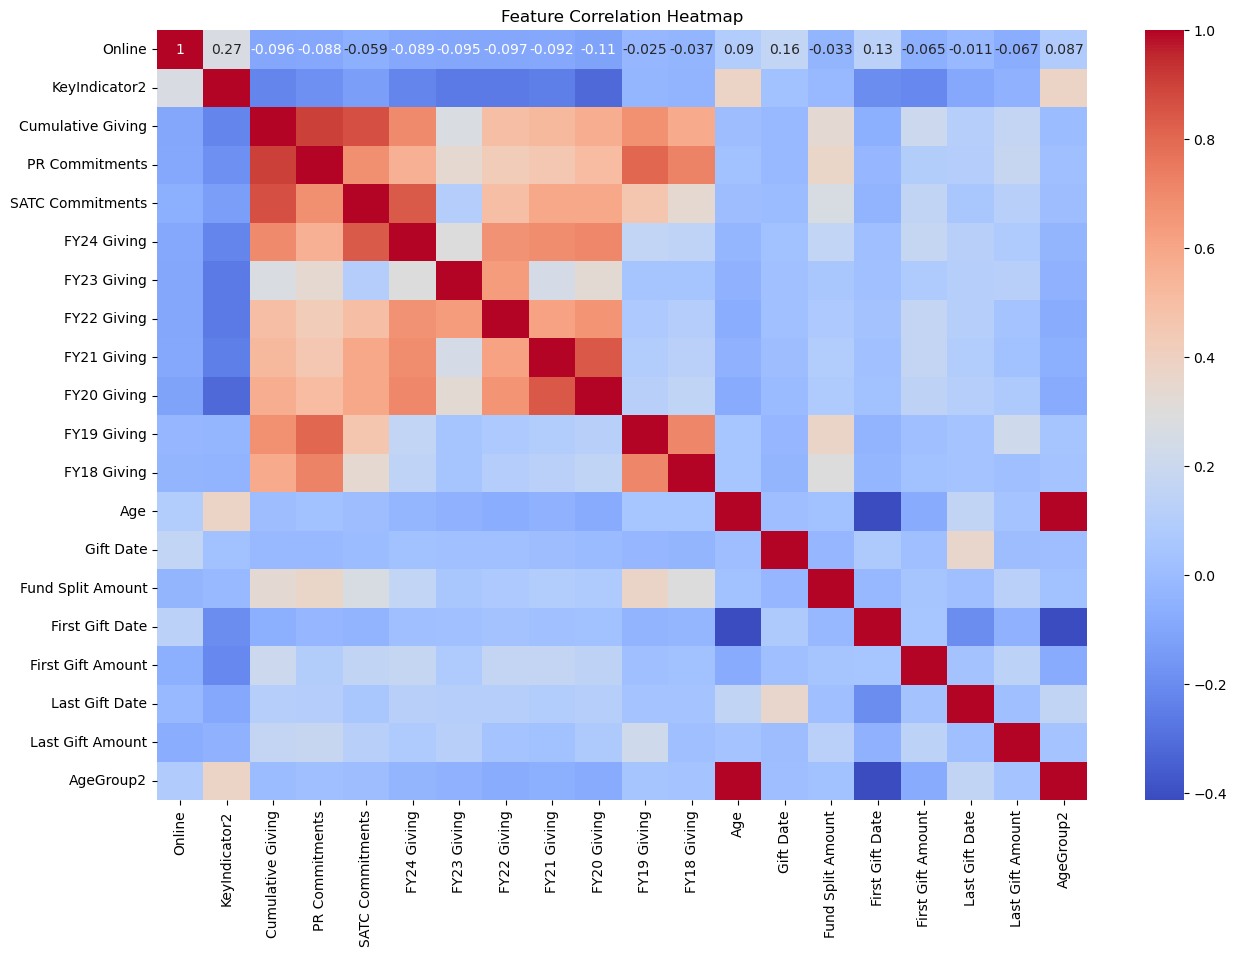

In [39]:
# plot heatmap
correlation_matrix = df[select_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

The most notable observation in this heatmap is that all the amounts column are most related to each other and may not be at all related to the other features in the dataset.

## Data Pre-processing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34778 entries, 0 to 34777
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Online                        34778 non-null  int64         
 1   Key Indicator                 34778 non-null  object        
 2   Constituent ID                34778 non-null  object        
 3   Class                         23452 non-null  object        
 4   Cumulative Giving             34778 non-null  float64       
 5   PR Commitments                34778 non-null  float64       
 6   SATC Commitments              34778 non-null  float64       
 7   FY24 Giving                   34778 non-null  float64       
 8   FY23 Giving                   34778 non-null  float64       
 9   FY22 Giving                   34778 non-null  float64       
 10  FY21 Giving                   34778 non-null  float64       
 11  FY20 Giving                 

In [42]:
# drop columns that will not be used or are not useful based on the heatmap
columns_to_drop = ['Key Indicator'
                   ,'Constituent ID'
                   ,'Class'
                   ,'Preferred State'
                   ,'Gift Date'
                   ,'Gift Amount'
                   ,'Fund Description'
                   ,'Campaign Description'
                   ,'Total Amount of Gifts_1'
                   ,'Gift Total Number of Gifts_1'
                   ,'Gift Payment Type'
                   ,'Gift Batch Description'
                   ,'First Gift Date'
                   ,'First Gift Amount'
                   ,'Last Gift Date'
                   ,'Last Gift Amount'
                   ,'AgeGroup']

df2 = df.drop(columns=columns_to_drop)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34778 entries, 0 to 34777
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Online             34778 non-null  int64  
 1   Cumulative Giving  34778 non-null  float64
 2   PR Commitments     34778 non-null  float64
 3   SATC Commitments   34778 non-null  float64
 4   FY24 Giving        34778 non-null  float64
 5   FY23 Giving        34778 non-null  float64
 6   FY22 Giving        34778 non-null  float64
 7   FY21 Giving        34778 non-null  float64
 8   FY20 Giving        34778 non-null  float64
 9   FY19 Giving        34778 non-null  float64
 10  FY18 Giving        34778 non-null  float64
 11  Age                34778 non-null  int32  
 12  Fund Split Amount  34778 non-null  float64
 13  KeyIndicator2      34778 non-null  int64  
 14  AgeGroup2          34778 non-null  int32  
dtypes: float64(11), int32(2), int64(2)
memory usage: 3.7 MB


In [44]:
# define features and target variables
X = df2.drop('Online', axis=1)
y = df2['Online']

In [45]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# use standardscaler to scale the features (X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Standardization helps in ensuring that all features contribute equally to the model. This is helpful as some amounts are very low while some are very high.

In [47]:
# handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

SMOTE (Synthetic Minority Oversampling Technique) can create synthetic examples of the online class (the minority group of the two) to balance the dataset.

# Applying Machine Learning Algorithms

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score
                             ,classification_report
                             ,recall_score
                             ,f1_score
                             ,roc_auc_score
                             ,precision_score
                             ,mean_absolute_error
                             ,mean_squared_error
                             ,r2_score
                             ,confusion_matrix)

In [49]:
# apply and fit random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [50]:
# predict test set
y_pred_rf = rf.predict(X_test_scaled)

In [51]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4262
           1       0.78      0.83      0.80      2694

    accuracy                           0.84      6956
   macro avg       0.84      0.84      0.84      6956
weighted avg       0.85      0.84      0.85      6956



In [52]:
# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[3648  614]
 [ 468 2226]]


In [53]:
# calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_rf)

print("AUC-ROC:",auc_roc)

AUC-ROC: 0.8411084019025543


Notables:
- The precision and recall when predicting online (1) and offline (0) donations using the random forest classifier look acceptable at an average of 84%. This model can accurately predict offline donations (87%) better than online (80%).
- In terms of accuracy, the model can correctly classify a donation 84% of the time.
- The AUC-ROC shows the model's ability to distinguish between classes at 84.11%

Confusion Matrix:
- True Negatives (Offline correctly predicted): 3,648
- False Positives (Incorrectly predicted as online): 614
- False Negatives (Incorrectly predicted as offline): 468
- True Positives (Online correctly predicted): 2,226

## XGBoost

In [54]:
# install xgboost
#!pip install xgboost

In [55]:
from xgboost import XGBClassifier

In [56]:
# apply and fit xgboost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [57]:
# predict test set
y_pred_xgb = xgb.predict(X_test_scaled)

In [58]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4262
           1       0.69      0.80      0.74      2694

    accuracy                           0.78      6956
   macro avg       0.78      0.79      0.78      6956
weighted avg       0.80      0.78      0.79      6956



In [59]:
# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix:
[[3294  968]
 [ 528 2166]]


In [60]:
# calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_xgb)

print("AUC-ROC:",auc_roc)

AUC-ROC: 0.7884427462247301


In [61]:
# creating a comparison table
metrics = {'Metric': ['Accuracy'
                      , 'AUC-ROC'
                      , 'Precision (Class 0)'
                      , 'Precision (Class 1)'
                      , 'Recall (Class 0)'
                      , 'Recall (Class 1)'
                      , 'F1-Score (Class 0)'
                      , 'F1-Score (Class 1)'],
        'Random Forest': [0.8445, 0.8411, 0.89, 0.78, 0.86, 0.83, 0.87, 0.80],
        'XGBoost': [0.78, 0.7884, 0.86, 0.69, 0.77, 0.80, 0.81, 0.74]}

# put the values in a df
comparison_df = pd.DataFrame(metrics)

# print comparison table
print(comparison_df)

                Metric  Random Forest  XGBoost
0             Accuracy           0.84     0.78
1              AUC-ROC           0.84     0.79
2  Precision (Class 0)           0.89     0.86
3  Precision (Class 1)           0.78     0.69
4     Recall (Class 0)           0.86     0.77
5     Recall (Class 1)           0.83     0.80
6   F1-Score (Class 0)           0.87     0.81
7   F1-Score (Class 1)           0.80     0.74


Overall Performance:
- Random Forest performs better with higher accuracy (0.84 vs 0.78)
- Random Forest shows stronger AUC-ROC score (0.84 vs 0.79)
- Random Forest better predicts both classes:
    - Offline donations (Class 0): RF precision 0.89 vs XGB 0.86
    - Online donations (Class 1): RF precision 0.78 vs XGB 0.69
- Confusion Matrix Comparison:
    - Random Forest: [[3648, 614], [468, 2226]]
    - XGBoost: [[3294, 968], [528, 2166]]
    - Random Forest has less misclassifications overall

## KMeans Clustering - PCA

In [62]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [63]:
# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_resampled)

In [64]:
# apply kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

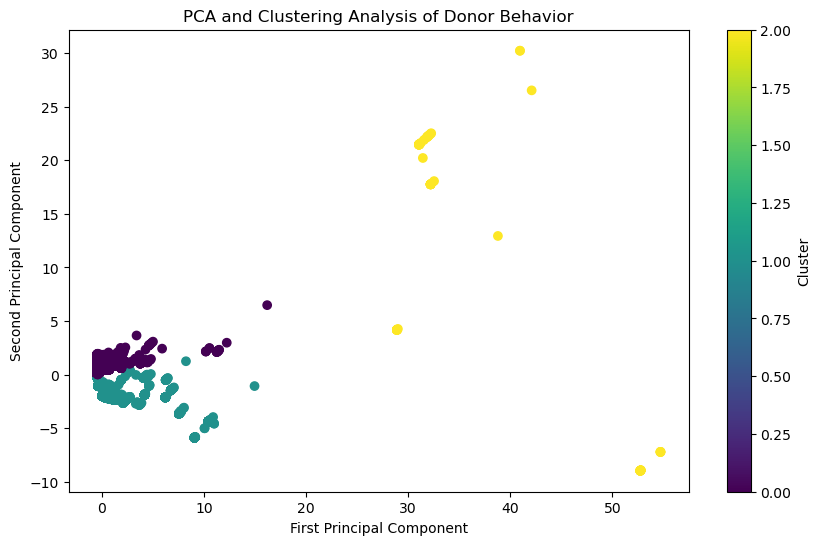

In [65]:
# create visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA and Clustering Analysis of Donor Behavior')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [66]:
# explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.38897719 0.18563485]


There are three distict clusters that has been identified using PCA. 
- A purple cluster, mostly above 0 on the y-axis, which represents the typical donor behavior of a more consistent and predicatable giving pattern. 
- A blue-green cluster, moslty below 0 on the y-axis, which indicates donor behavior that is not typical or is varied in terms of giving patterns.  
- A yellow cluster that is dispersed which represents outliers or donors that have a very distinct giving patterns compared to the rest.

The explained variance ratio (38.9% + 18.6% = 57.5%) indicates that the two principal components were able to capture 57.5% of the total variance in the data which somehow provides a reasonably good representation of the underlying patterns in donor behavior.

## Time-series Analysis

In [67]:
from statsmodels.tsa.arima.model import ARIMA

In [68]:
# use the un-preprocessed dataset and separate online from offline
online = df[df['Online'] == 1][['Gift Date', 'Fund Split Amount']]
offline = df[df['Online'] == 0][['Gift Date', 'Fund Split Amount']]

# sort by date
online = online.sort_values('Gift Date')
offline = offline.sort_values('Gift Date')

In [69]:
# set the date range
date_range = pd.date_range(start='2017-07-01', end='2024-06-30', freq='M')

In [70]:
# resample data to monthly frequency with complete date range
online_monthly = online.set_index('Gift Date').resample('M')['Fund Split Amount'].sum()
offline_monthly = offline.set_index('Gift Date').resample('M')['Fund Split Amount'].sum()

In [71]:
# reindex to ensure all months are included
online_monthly = online_monthly.reindex(date_range, fill_value=0)
offline_monthly = offline_monthly.reindex(date_range, fill_value=0)

In [72]:
# fit arima models
def fit_and_forecast(data, steps=12):
    model = ARIMA(data, order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=steps)
    return results, forecast

In [73]:
# generate forecasts
online_model, online_forecast = fit_and_forecast(online_monthly)
offline_model, offline_forecast = fit_and_forecast(offline_monthly)

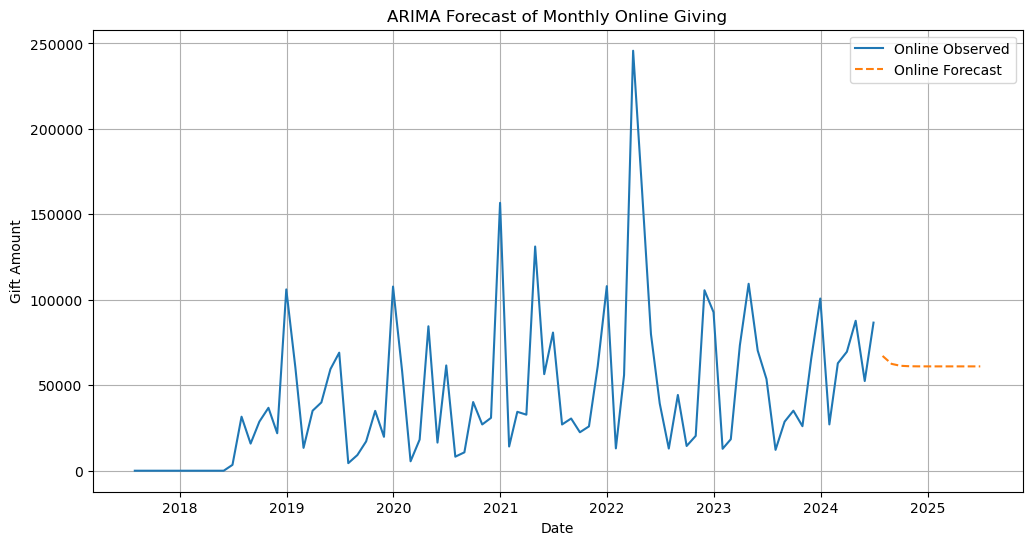

In [74]:
# plot online results
plt.figure(figsize=(12, 6))
plt.plot(online_monthly.index, online_monthly, label='Online Observed')
plt.plot(online_forecast.index, online_forecast, '--', label='Online Forecast')
plt.title('ARIMA Forecast of Monthly Online Giving')
plt.xlabel('Date')
plt.ylabel('Gift Amount')
plt.legend()
plt.grid(True)
plt.show()

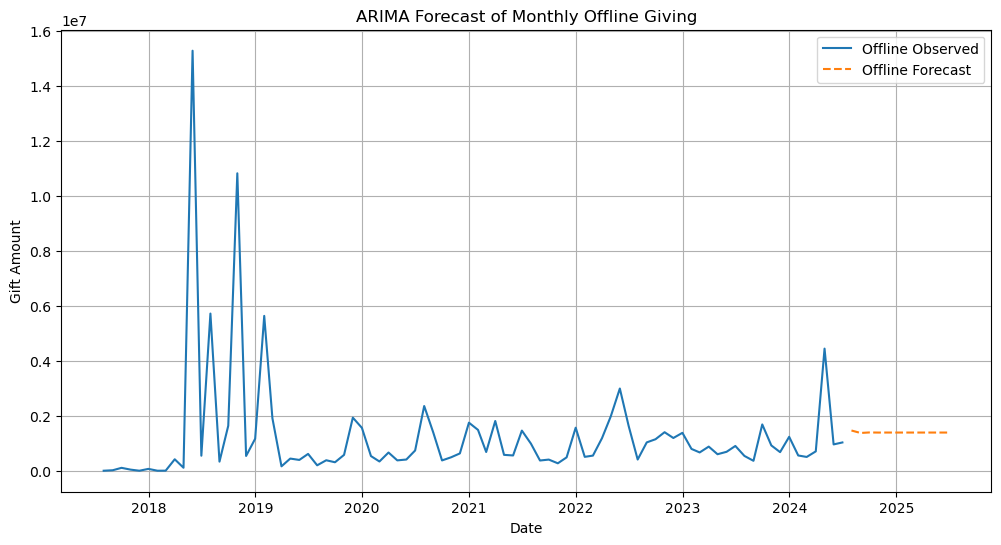

In [75]:
# plot offline results
plt.figure(figsize=(12, 6))
plt.plot(offline_monthly.index, offline_monthly, label='Offline Observed')
plt.plot(offline_forecast.index, offline_forecast, '--', label='Offline Forecast')
plt.title('ARIMA Forecast of Monthly Offline Giving')
plt.xlabel('Date')
plt.ylabel('Gift Amount')
plt.legend()
plt.grid(True)
plt.show()

The ARIMA forecast for monthly online and offline giving shows a very poor forecast quality. The cause might be the random spikes or variablity in the data which made it fail in capturing the dynamics in the historical data. I will try a different forecasting model called Exponential Smoothing to better capture the trends in the data. 

In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [77]:
# fit exponential smoothing model for online donations
es_model_online = ExponentialSmoothing(online_monthly
                                       ,seasonal_periods=12
                                       ,trend='add'
                                       ,seasonal='add'
                                       ,damped=True)

es_fit_online = es_model_online.fit(optimized=True)

C:\Users\conduit\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [78]:
# generate online forecasts
es_forecast_online = es_fit_online.forecast(steps=12)

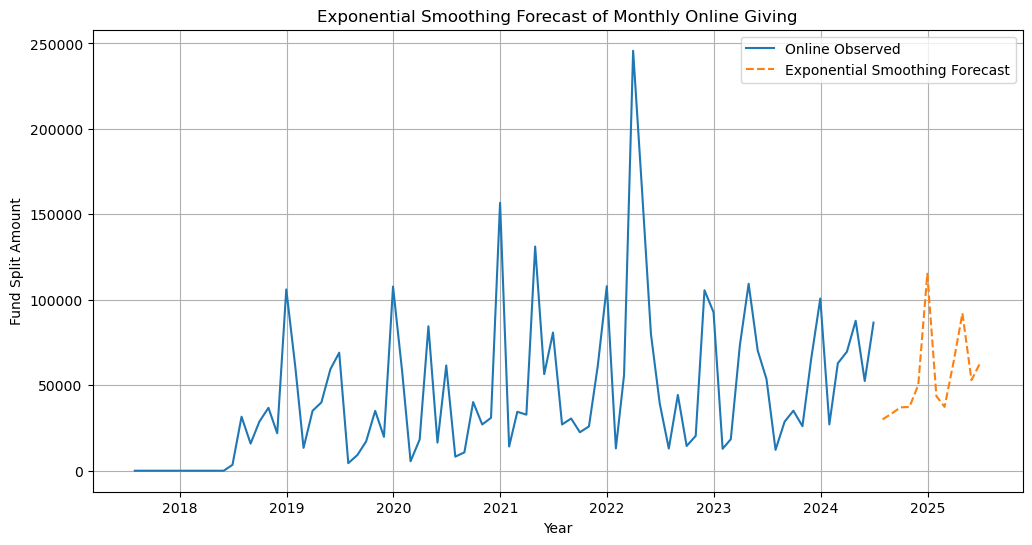

In [79]:
# plot online results
plt.figure(figsize=(12, 6))
plt.plot(online_monthly.index, online_monthly, label='Online Observed')
plt.plot(es_forecast_online.index, es_forecast_online, '--', label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast of Monthly Online Giving')
plt.xlabel('Year')
plt.ylabel('Fund Split Amount')
plt.legend()
plt.grid(True)
plt.show()

Notables:
- Significant online giving in early 2022, reaching almost USD250,000
- Regular peaks after the high 2022 at around USD100,000
- The forecast shows a cyclical peak at around year-end and still shows volatility
- It captures the seasonal nature of donations (i.e. year-end, university events, etc)

In [80]:
# fit holt-winters model for offline donations
es_model_offline = ExponentialSmoothing(offline_monthly
                                       ,seasonal_periods=12
                                       ,trend='add'
                                       ,seasonal='add'
                                       ,damped=True)

es_fit_offline = es_model_offline.fit(optimized=True)

C:\Users\conduit\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [81]:
# generate offline forecasts
es_forecast_offline = es_fit_offline.forecast(steps=12)

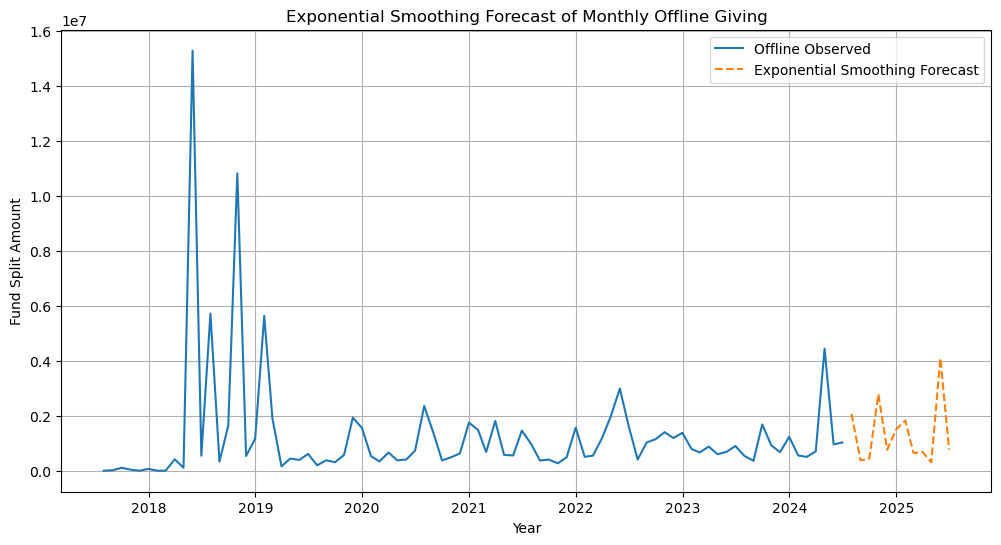

In [82]:
# plot offline results
plt.figure(figsize=(12, 6))
plt.plot(offline_monthly.index, offline_monthly, label='Offline Observed')
plt.plot(es_forecast_offline.index, es_forecast_offline, '--', label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast of Monthly Offline Giving')
plt.xlabel('Year')
plt.ylabel('Fund Split Amount')
plt.legend()
plt.grid(True)
plt.show()

Notables:
- Major spikes in mid-2018 to early 2019 then started to stabilize post-2020.
- The forecast shows a bit higher donations in FY 2025 which is probably caused by the spike in mid-2024, the end of FY24. There is a major event that happened during that time which may have affected the predictions.

Online and Offline Donations Forecast Comparison:
- Both classes show volatility throughout the years but the online class shows more consistency. Since online donations are predominantly driven by Gen Z and Millennials, enrolled undergraduate and graduate students show a more dynamic giving pattern by real-time engagement during active events.
- The forecast quality is much better compared to ARIMA's flat predictions. The Exponential Smoothing model was able to provide a better forecast cconsidering the seasonality and volatility of the giving patterns throughout the year.